---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Assignment 4 - Understanding and Predicting Property Maintenance Fines

This assignment is based on a data challenge from the Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)). 

The Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)) and the Michigan Student Symposium for Interdisciplinary Statistical Sciences ([MSSISS](https://sites.lsa.umich.edu/mssiss/)) have partnered with the City of Detroit to help solve one of the most pressing problems facing Detroit - blight. [Blight violations](http://www.detroitmi.gov/How-Do-I/Report/Blight-Complaint-FAQs) are issued by the city to individuals who allow their properties to remain in a deteriorated condition. Every year, the city of Detroit issues millions of dollars in fines to residents and every year, many of these fines remain unpaid. Enforcing unpaid blight fines is a costly and tedious process, so the city wants to know: how can we increase blight ticket compliance?

The first step in answering this question is understanding when and why a resident might fail to comply with a blight ticket. This is where predictive modeling comes in. For this assignment, your task is to predict whether a given blight ticket will be paid on time.

All data for this assignment has been provided to us through the [Detroit Open Data Portal](https://data.detroitmi.gov/). **Only the data already included in your Coursera directory can be used for training the model for this assignment.** Nonetheless, we encourage you to look into data from other Detroit datasets to help inform feature creation and model selection. We recommend taking a look at the following related datasets:

* [Building Permits](https://data.detroitmi.gov/Property-Parcels/Building-Permits/xw2a-a7tf)
* [Trades Permits](https://data.detroitmi.gov/Property-Parcels/Trades-Permits/635b-dsgv)
* [Improve Detroit: Submitted Issues](https://data.detroitmi.gov/Government/Improve-Detroit-Submitted-Issues/fwz3-w3yn)
* [DPD: Citizen Complaints](https://data.detroitmi.gov/Public-Safety/DPD-Citizen-Complaints-2016/kahe-efs3)
* [Parcel Map](https://data.detroitmi.gov/Property-Parcels/Parcel-Map/fxkw-udwf)

___

We provide you with two data files for use in training and validating your models: train.csv and test.csv. Each row in these two files corresponds to a single blight ticket, and includes information about when, why, and to whom each ticket was issued. The target variable is compliance, which is True if the ticket was paid early, on time, or within one month of the hearing data, False if the ticket was paid after the hearing date or not at all, and Null if the violator was found not responsible. Compliance, as well as a handful of other variables that will not be available at test-time, are only included in train.csv.

Note: All tickets where the violators were found not responsible are not considered during evaluation. They are included in the training set as an additional source of data for visualization, and to enable unsupervised and semi-supervised approaches. However, they are not included in the test set.

<br>

**File descriptions** (Use only this data for training your model!)

    readonly/train.csv - the training set (all tickets issued 2004-2011)
    readonly/test.csv - the test set (all tickets issued 2012-2016)
    readonly/addresses.csv & readonly/latlons.csv - mapping from ticket id to addresses, and from addresses to lat/lon coordinates. 
     Note: misspelled addresses may be incorrectly geolocated.

<br>

**Data fields**

train.csv & test.csv
    
| Column Name| Description |
| :-: | :-: |
|ticket_id| Unique identifier for tickets|
|agency_name| Agency that issued the ticket|
|inspector_name| Name of inspector that issued the ticket|
|violator_name| Name of the person/organization that the ticket was issued to |
|violation_street_number, violation_street_name, violation_zip_code | Address where the violation occurred|
|mailing_address_str_number, mailing_address_str_name, city, state, zip_code, non_us_str_code, country | Mailing address of the violator |
|ticket_issued_date | Date and time the ticket was issued|
|hearing_date| Date and time the violator's hearing was scheduled|
|violation_code, violation_description | Type of violation |
|disposition | Judgment and judgement type |
|fine_amount | Violation fine amount, excluding fees |
|admin_fee | 20 dollar fee assigned to responsible judgments |
|state_fee | 10 dollar fee assigned to responsible judgments|
|late_fee | 10% fee assigned to responsible judgments |
|discount_amount | discount applied, if any |
|clean_up_cost | DPW clean-up or graffiti removal cost |
|judgment_amount | Sum of all fines and fees |
|grafitti_status | Flag for graffiti violations |
    
train.csv only

    payment_amount - Amount paid, if any
    payment_date - Date payment was made, if it was received
    payment_status - Current payment status as of Feb 1 2017
    balance_due - Fines and fees still owed
    collection_status - Flag for payments in collections
    compliance [target variable for prediction] 
     Null = Not responsible
     0 = Responsible, non-compliant
     1 = Responsible, compliant
    compliance_detail - More information on why each ticket was marked compliant or non-compliant


___

## Evaluation

Your predictions will be given as the probability that the corresponding blight ticket will be paid on time.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC). 

Your grade will be based on the AUC score computed for your classifier. A model which with an AUROC of 0.7 passes this assignment, over 0.75 will recieve full points.
___

For this assignment, create a function that trains a model to predict blight ticket compliance in Detroit using `readonly/train.csv`. Using this model, return a series of length 61001 with the data being the probability that each corresponding ticket from `readonly/test.csv` will be paid, and the index being the ticket_id.

Example:

    ticket_id
       284932    0.531842
       285362    0.401958
       285361    0.105928
       285338    0.018572
                 ...
       376499    0.208567
       376500    0.818759
       369851    0.018528
       Name: compliance, dtype: float32
       
### Hints

* Make sure your code is working before submitting it to the autograder.

* Print out your result to see whether there is anything weird (e.g., all probabilities are the same).

* Generally the total runtime should be less than 10 mins. You should NOT use Neural Network related classifiers (e.g., MLPClassifier) in this question. 

* Try to avoid global variables. If you have other functions besides blight_model, you should move those functions inside the scope of blight_model.

* Refer to the pinned threads in Week 4's discussion forum when there is something you could not figure it out.

In [25]:
import pandas as pd
import numpy as np

In [26]:
# Import the data
#train_data = pd.read_csv("readonly/train.csv", encoding='latin-1')
#test_data = pd.read_csv("readonly/test.csv")
#addresses_data = pd.read_csv("readonly/addresses.csv")
#lat_lons_data = pd.read_csv("readonly/latlons.csv")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
# EDA
#print(f"* Training Data - Column Nº: {len(train_data.columns)}")
#print(train_data.columns,'\n')
#print(f"* Test Data Column Nº: {len(test_data.columns)} cols")
#print(test_data.columns,'\n')
#print(f"* Addresses Data Column Nº: {len(addresses_data.columns)} cols")
#print(addresses_data.columns,'\n')
#print(f"* Lat & Long Data Column Nº: {len(lat_lons_data.columns)} cols")
#print(lat_lons_data.columns)

In [28]:
# Check for null values in the predicted values
# We can see that the compliance column have missing values, and because we want to predict that column, we cannot
# think of a good way to impute those values, so we are going to drop the NaN from the training data
# Drop the Null values in comliance column
#train_data = train_data[~train_data['compliance'].isnull()]

# Filter the train and test data by country
# Because the addresses are only from the US, there is no sence to keep the data that is not from the US, so the
# next step is to filter the data by the country == 'USA'
#us_train_data = train_data[train_data['country'] == 'USA']
#us_test_data = test_data[test_data['country'] == 'USA']

In [29]:
# As seen before in the columns, the dataframes can be merged together, the first merge (inner) is between the
# address and ticket, then, the second merge (inner) is joining the train and test datasets with the first merge.
# Merge the train and test datasets
#train_merged = pd.merge(train_data, pd.merge(addresses_data, lat_lons_data, on='address'), on='ticket_id')
#test_merged = pd.merge(test_data, pd.merge(addresses_data, lat_lons_data, on='address'), on='ticket_id')

In [30]:
# The next step is to check for null values in the merged datasets and select only the columns that can be used
# to estimate the predictions

# For the latitud and the longitud we cannot delete the values because they have the requeired length for the correct
# answer, so if we remove them, wi won't have all the points for the assignment
# Fill the train and test lat and long nan values with median() of the respective column
#train_merged['lat'] = train_merged['lat'].fillna(train_merged['lat'].median())
#train_merged['lon'] = train_merged['lon'].fillna(train_merged['lon'].median())
#test_merged['lat'] = test_merged['lat'].fillna(test_merged['lat'].median())
#test_merged['lon'] = test_merged['lon'].fillna(test_merged['lon'].median())

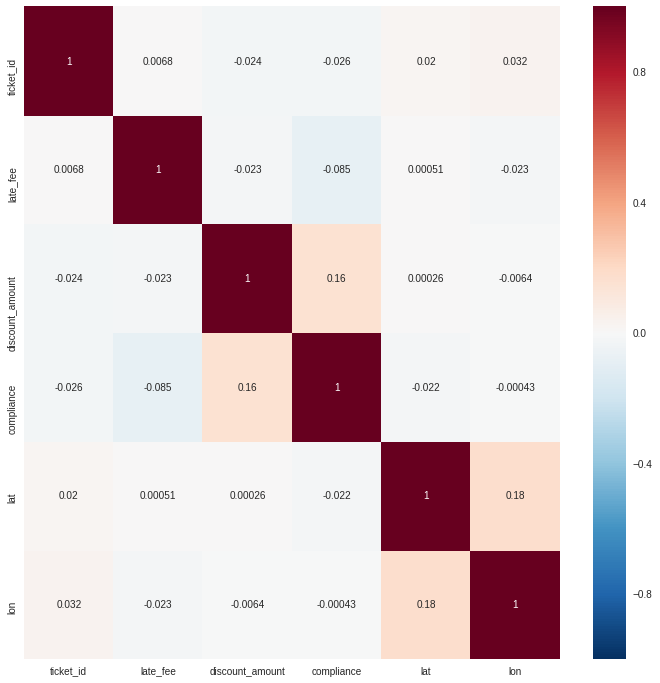

In [32]:
#%matplotlib inline

#import seaborn as sns
#import matplotlib.pyplot as plt

# Plot the correlation heatmap to select the best features that influence in the compliance (target value)

#plt.figure(figsize=(12,12))
#sns.heatmap(train_merged.drop(drop_col_list_train_mask, axis=1).corr(), annot=True)

In [33]:
#train_merged.drop(drop_col_list_train_mask, axis=1).columns

Index(['ticket_id', 'violation_code', 'disposition', 'late_fee',
       'discount_amount', 'compliance', 'lat', 'lon'],
      dtype='object')

In [34]:
# Now that we have selected the mail columns from the training dataframe, the next step is to set the test columns
# to be the same as the train dataset

# To look for the exact test columns let's use sets theory to elaborate a mask
#test_col_mask = set(test_merged.columns).intersection(set(train_merged.columns).difference(set(drop_col_list_train_mask)))
#test_merged = test_merged.loc[:, test_col_mask]

# The only difference is that the train_merged dataset contains the target value column and the test doesn't
#train_merged = train_merged.drop(drop_col_list_train_mask, axis=1)

# There are no null values in eather one of the new merged dataframes from this point forward

In [36]:
# The next step is going to transform the disposition object using OneHotEncoding
#from sklearn.preprocessing import LabelEncoder

# The next step is going to transform using Label Encoder
#label_encoder = LabelEncoder()
#label_encoder.fit(train_merged['disposition'].append(test_merged['disposition']))
#train_merged['disposition'] = label_encoder.transform(train_merged['disposition'])
#test_merged['disposition'] = label_encoder.transform(test_merged['disposition'])

#label_encoder = LabelEncoder()
#label_encoder.fit(train_merged['violation_code'].append(test_merged['violation_code']))
#train_merged['violation_code'] = label_encoder.transform(train_merged['violation_code'])
#test_merged['violation_code'] = label_encoder.transform(test_merged['violation_code'])

In [ ]:
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import roc_auc_score

#features = ['disposition', 'violation_code', 'discount_amount', 'lat', 'lon']

# Split the data in train and test split (dummy_train_data)
#X = train_merged[features]
#y = train_merged['compliance']

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# Set the random forest regressor() object
#reg_rf = RandomForestRegressor()

# Set the grid values parameters for the gridsearch
#param_grid = {'max_depth': [None, 10, 20, 30]} # 'max_features': ['auto', 'sqrt', 'log2'], 'criterion': ['mse', 'mae']
#grid_auc = GridSearchCV(reg_rf, param_grid=param_grid, scoring='roc_auc')
#grid_auc.fit(X_train, y_train)

#print('Grid best parameter (max. AUC): ', grid_auc.best_params_)
#print('Grid best score (AUC): ', grid_auc.best_score_)

#df = pd.DataFrame(grid_auc.predict(test_merged[features]), index=test_merged['ticket_id'])
#df

---

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder


def blight_model():

    # Your code here
    # Import the data
    train_data = pd.read_csv("train.csv", encoding='latin-1')
    test_data = pd.read_csv("test.csv")
    addresses_data = pd.read_csv("addresses.csv")
    lat_lons_data = pd.read_csv("latlons.csv")
    
    # Check for null values in the predicted values
    # We can see that the compliance column have missing values, and because we want to predict that column, we cannot
    # think of a good way to impute those values, so we are going to drop the NaN from the training data
    # Drop the Null values in comliance column
    train_data = train_data[~train_data['compliance'].isnull()]

    # Filter the train and test data by country
    # Because the addresses are only from the US, there is no sence to keep the data that is not from the US, so the
    # next step is to filter the data by the country == 'USA'
    us_train_data = train_data[train_data['country'] == 'USA']
    us_test_data = test_data[test_data['country'] == 'USA']
    
    # As seen before in the columns, the dataframes can be merged together, the first merge (inner) is between the
    # address and ticket, then, the second merge (inner) is joining the train and test datasets with the first merge.
    # Merge the train and test datasets
    train_merged = pd.merge(train_data, pd.merge(addresses_data, lat_lons_data, on='address'), on='ticket_id')
    test_merged = pd.merge(test_data, pd.merge(addresses_data, lat_lons_data, on='address'), on='ticket_id')
    
    # The next step is to check for null values in the merged datasets and select only the columns that can be used
    # to estimate the predictions

    # For the latitud and the longitud we cannot delete the values because they have the requeired length for the correct
    # answer, so if we remove them, wi won't have all the points for the assignment
    # Fill the train and test lat and long nan values with median() of the respective column
    train_merged['lat'] = train_merged['lat'].fillna(train_merged['lat'].median())
    train_merged['lon'] = train_merged['lon'].fillna(train_merged['lon'].median())
    test_merged['lat'] = test_merged['lat'].fillna(test_merged['lat'].median())
    test_merged['lon'] = test_merged['lon'].fillna(test_merged['lon'].median())
    
    # The next step is going to transform using Label Encoder
    label_encoder = LabelEncoder()
    label_encoder.fit(train_merged['disposition'].append(test_merged['disposition']))
    train_merged['disposition'] = label_encoder.transform(train_merged['disposition'])
    test_merged['disposition'] = label_encoder.transform(test_merged['disposition'])

    label_encoder = LabelEncoder()
    label_encoder.fit(train_merged['violation_code'].append(test_merged['violation_code']))
    train_merged['violation_code'] = label_encoder.transform(train_merged['violation_code'])
    test_merged['violation_code'] = label_encoder.transform(test_merged['violation_code'])
    
    # Set the features that are going to be used in the model
    features = ['disposition', 'violation_code', 'discount_amount', 'lat', 'lon']

    # Split the data in train and test split (dummy_train_data)
    X = train_merged[features]
    y = train_merged['compliance']

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # Set the random forest regressor() object
    reg_rf = RandomForestRegressor()

    # Set the grid values parameters for the gridsearch
    param_grid = {'max_depth': [None, 10, 20, 30]}
    grid_auc = GridSearchCV(reg_rf, param_grid=param_grid, scoring='roc_auc')
    grid_auc.fit(X_train, y_train)

    #print('Grid best parameter (max. AUC): ', grid_auc.best_params_)
    #print('Grid best score (AUC): ', grid_auc.best_score_)

    df = pd.DataFrame(grid_auc.predict(test_merged[features]), index=test_merged['ticket_id'])
    
    return df

In [2]:
#blight_model()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2827: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


FileNotFoundError: File b'test.csv' does not exist

---